<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LABRARIES

# load Required Libraries
# IMPORT DATA SCIENCE LIBRARIES
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.spatial.distance import cdist 
from matplotlib import pyplot as plt

# Display plots in Jupypter Notebooks
%matplotlib inline

# IMPORT SKLEARN FUNCTIONS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.cluster import KMeans
from sklearn import neighbors, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics.cluster import homogeneity_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:
breast_cancer_csv = '../../DATA/breast-cancer-wisconsin-data.csv'
cancer = pd.read_csv(r"C:\Users\micha\Documents\GitHub\ds-mel-pt-24feb-projects\MichaelPresidente\Data\breast-cancer-wisconsin-data.csv")

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [3]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Remove unnecessary columns
cancer.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

### 3. Subset & Normalize

Subset the data to only include all columns except diagnosis. We will be comparing the principal components to age specifically, so we are leaving age out.

In [5]:
# Select headers from source dataset
header_list = list(cancer.columns[2:32])

In [6]:
# covert to dictionary
header_columns = { i : header_list[i] for i in range(0, len(header_list))}

In [7]:
# Remove the all variables except diagnosis: save as an array
X = cancer.iloc[:, 2:32].values

In [8]:
# Standardize the data and copy to a dataframe
X_std =pd.DataFrame(StandardScaler().fit_transform(X)).copy()

In [9]:
X_std.rename(columns=header_columns,inplace =True)

In [10]:
# Create the target data
y = cancer["diagnosis"]

In [11]:
y.head

<bound method NDFrame.head of 0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object>

In [12]:
# Change to Boolean: 0 - True, 1 - False
y.replace({"M" : 0,"B": 1}, inplace = True)

In [29]:
target =pd.DataFrame(y).copy()

### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

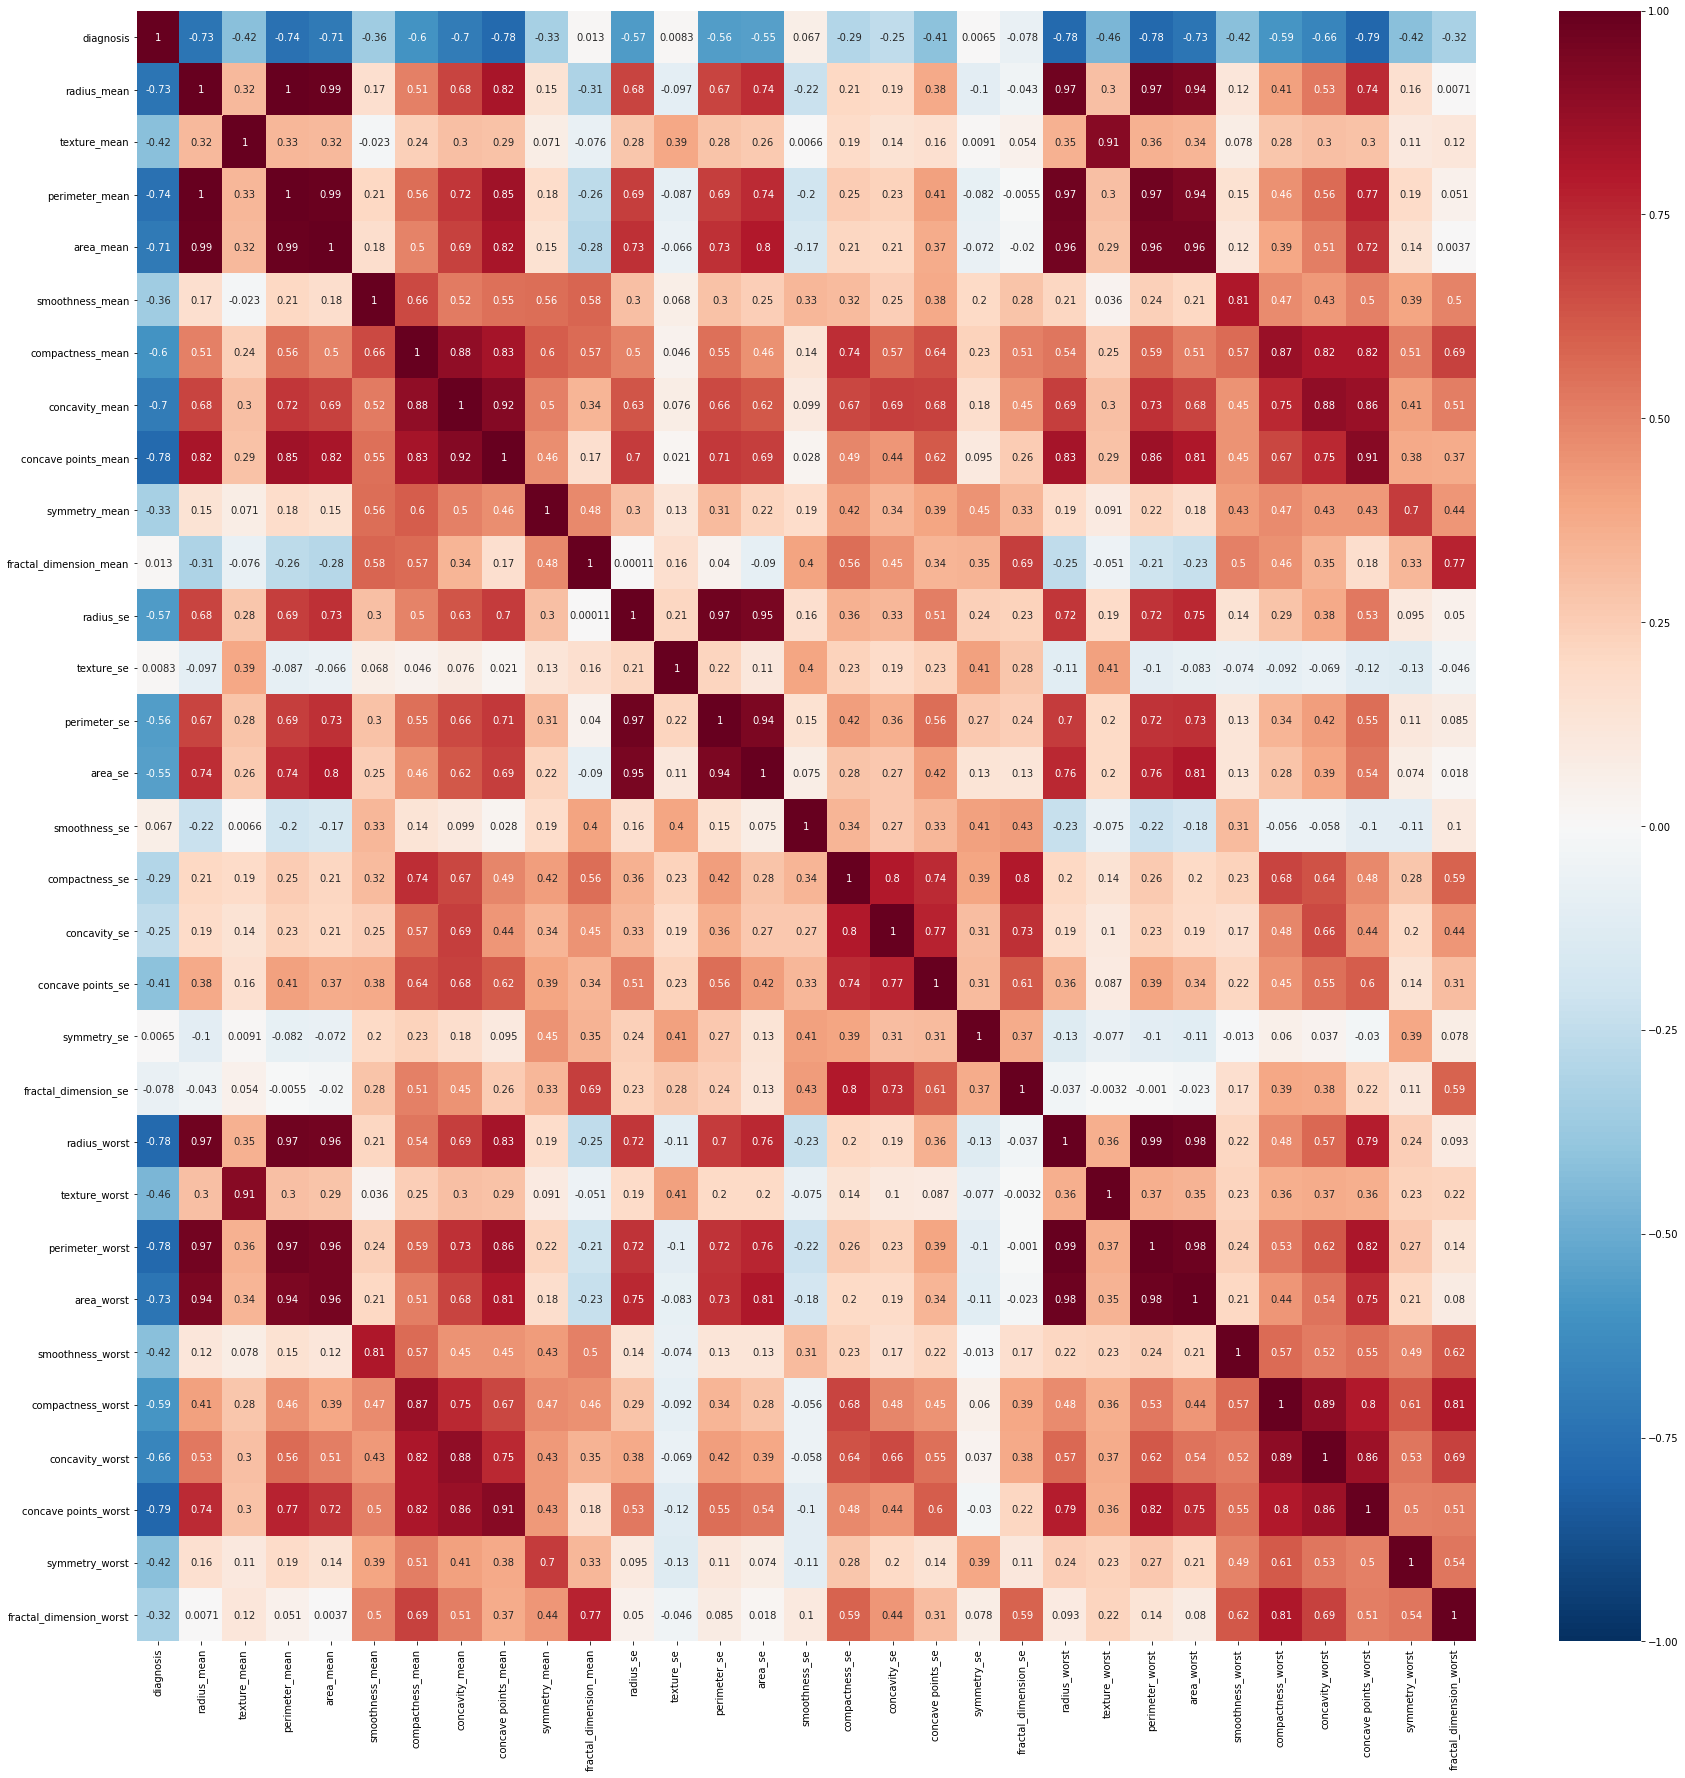

In [15]:
# ANSWER
corr = cancer.corr()
plt.figure(figsize = (30,30))
# sns.heatmap(corr, 
#            xticklabels=corr.columns.values,
#            yticklabels=corr.columns.values)
heatmap = sns.heatmap(corr, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [11]:
# ANSWER
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

NameError: name 'correlation_matrix' is not defined

### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [12]:
def calculate_cum_var_exp(eig_vals):
    '''
    Calculate Explained Variance from Eigenvalues
    '''
    return cum_var_exp

In [13]:
def plot_var_exp(eig_vals):
    
    cum_var_exp = calculate_cum_var_exp(eig_vals)
    
    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)

    plt.show()

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [16]:
# ANSWER
# Create an instance of PCA - 29 Features (Components)
pca = PCA(n_components=29)

# Fit Xs
pca.fit_transform(X_std)

array([[ 9.23560469e+00,  1.42603489e+00, -1.12663733e+00, ...,
        -2.48980096e-01, -4.96088571e-02,  2.72727327e-02],
       [ 1.89144333e+00, -3.61195861e+00, -5.33194852e-01, ...,
         1.66421650e-01,  3.10787762e-02, -4.21540708e-03],
       [ 5.47475401e+00, -1.23081459e+00, -5.55719344e-01, ...,
         5.19475159e-02,  4.39510032e-02,  5.56877740e-03],
       ...,
       [ 1.05822819e+00, -1.90173275e+00,  5.56312229e-01, ...,
        -2.41975015e-02, -1.76739547e-03,  7.70562915e-03],
       [ 1.02778256e+01,  1.20267683e+00, -1.88193201e+00, ...,
        -5.51677845e-02, -5.84526127e-02, -9.08183429e-02],
       [-5.22775176e+00, -6.65886035e-01,  1.48148911e+00, ...,
         1.85767373e-01, -1.32259527e-02, -6.79925806e-02]])

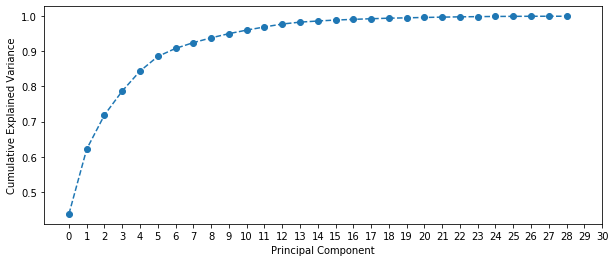

In [18]:
# ANSWER
# Plot explained_variance_
plt.figure(figsize = (10, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(0, 31, 1.0))
plt.show()

In [19]:
# ANSWER
# Apply dimensionality reduction to Xs using transform
# Create an instance of PCA - 10 Features (Components)
pca = PCA(n_components=10)

In [20]:
# Fit X standard data
pca.fit_transform(X_std)

array([[ 9.23560469,  1.42603489, -1.12663734, ..., -0.39753022,
        -0.3519342 ,  0.79169607],
       [ 1.89144333, -3.61195861, -0.53319485, ...,  0.25112373,
        -0.43861873, -1.16547107],
       [ 5.47475401, -1.23081459, -0.55571934, ...,  0.09552087,
         0.02939048, -0.49742808],
       ...,
       [ 1.05822819, -1.90173275,  0.55631223, ...,  0.33813677,
         0.45632593, -0.46874119],
       [10.27782557,  1.20267683, -1.88193201, ..., -0.27487511,
        -0.56014813, -0.02678844],
       [-5.22775176, -0.66588604,  1.48148909, ...,  1.04275436,
         0.32018051,  0.06892809]])

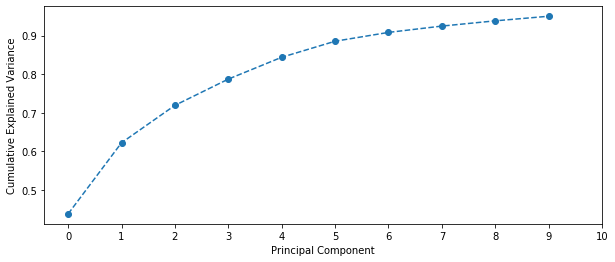

In [21]:
# Plot explained_variance_
plt.figure(figsize = (10, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(0, 11, 1.0))
plt.show()

### 7. Split Data to 80/20 and Use PCA you gon in 6 as X

Split data 80/20 and Use KNN to find score.

In [22]:
# Copy PCA to a dataframe:
pca_data = pca.fit_transform(X_std)

In [23]:
pca_dframe = pd.DataFrame(data = pca_data)

In [31]:
# Add target data
pca_10 = pd.concat([pca_dframe, target[['diagnosis']]], axis = 1)

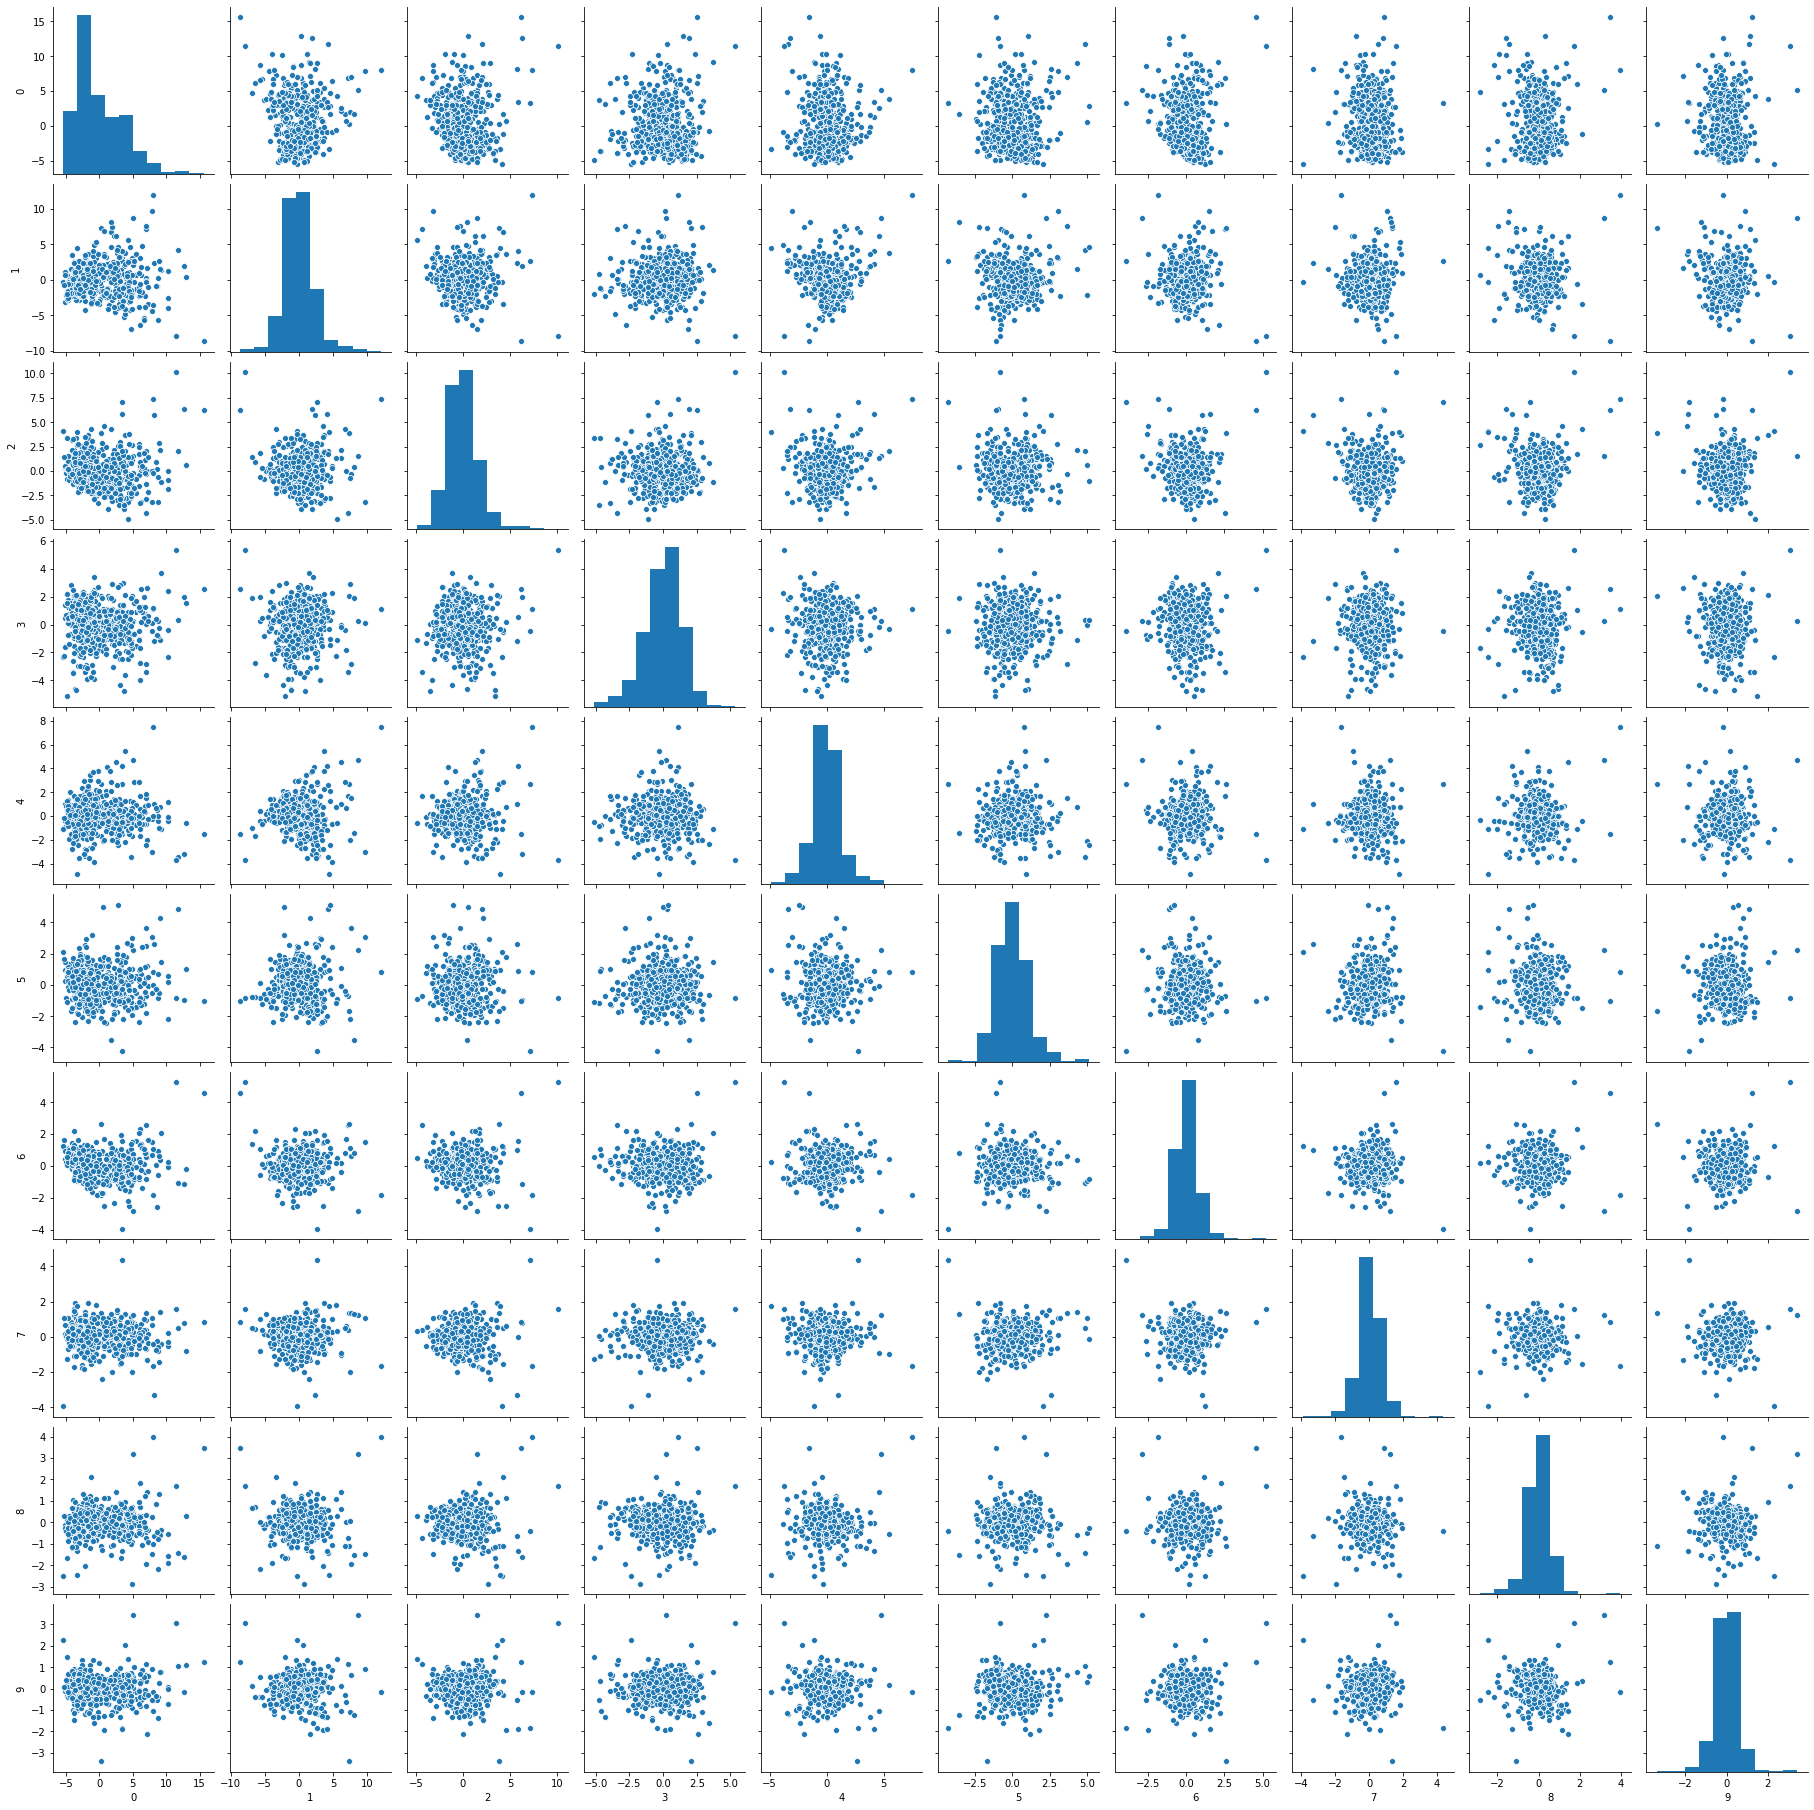

In [49]:
sns.pairplot(pca_dframe)

In [35]:
# ANSWER
# Split Data
X_train, X_test, y_train, y_test = train_test_split(pca_10, target, random_state=1, test_size = 0.2)

In [36]:
# ANSWER
knn=neighbors.KNeighborsClassifier()


In [39]:
# Fit Train Data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
# Calculate the predictor
pred = knn.predict(X_train)

In [42]:
# Print the Confusion Matrix
print(confusion_matrix(y_train,pred))

[[165   5]
 [  2 283]]


In [43]:
# Print the Classification Report
print(classification_report(y_train,pred))

precision    recall  f1-score   support

           0       0.99      0.97      0.98       170
           1       0.98      0.99      0.99       285

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [44]:
# Calculate the predictor
pred = knn.predict(X_test)

In [45]:
# Fit Test Data
knn.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
# Print the Confusion Matrix
print(confusion_matrix(y_test,pred))

[[38  4]
 [ 0 72]]


In [47]:
# Print the Classification Report
print(classification_report(y_test,pred))

precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



### This model may be slightly overfit but is highly accurate.

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



